In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

### 1. Importando archivo csv

In [2]:
df = pd.read_csv('sample.csv').drop('Unnamed: 0', axis=1)

### 2. Importando funciones modulo anterior

In [3]:
from ancilliary_funcs import missing_cases

In [4]:
# explorando casos perdidos en la muestra importada
for col in df.columns:
    missing_cases(df, var=col, print_list=False)
    print('-'*100)

Casos nulos para cname: 0
Porcentaje nulos para cname: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para ccodealp: 0
Porcentaje nulos para ccodealp: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para ht_region: 0
Porcentaje nulos para ht_region: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para gle_cgdpc: 1
Porcentaje nulos para gle_cgdpc: 0.010309278350515464
----------------------------------------------------------------------------------------------------
Casos nulos para undp_hdi: 6
Porcentaje nulos para undp_hdi: 0.061855670103092786
----------------------------------------------------------------------------------------------------
Casos nulos para imf_pop: 25
Porcentaje nulos para imf_pop: 0.25773195876288657
----------------------------------------------------------

### 3. Estimando puntaje Z

La variable con menor cantidad de casos perdidos es: "gle_cgdpc"

In [5]:
# seleccionamos columnas identificadoras y la variable con menor casos perdidos
df_gle = df.loc[:, ['cname', 'ccodealp', 'ht_region', 'gle_cgdpc']]

In [6]:
# eliminamos valores perdidos
df_gle = df_gle[~df_gle['gle_cgdpc'].isna()]

In [7]:
# obtenemos media y desviacion estandar
mean_gle = np.mean(df_gle['gle_cgdpc'])
std_gle = np.std(df_gle['gle_cgdpc'])

In [8]:
mean_gle, std_gle

(14425.3236915625, 19748.417009034943)

In [9]:
# creamos columna con puntaje z
df_gle['value_z'] = (df_gle['gle_cgdpc'] - mean_gle) / std_gle

In [10]:
# ordenamos el df por puntaje z
df_gle = df_gle.sort_values(by='value_z').reset_index(drop=True)

In [11]:
# seleccion primeras 10 filas
df_gle.head(10)

,cname,ccodealp,ht_region,gle_cgdpc,value_z
0,El Salvador,SLV,LatAm,332.26999,-0.713630
1,Burundi,BDI,SubSaharian,663.57001,-0.696854
2,Central African Republic,CAF,SubSaharian,690.03998,-0.695513
3,Ethiopia (1993-),ETH,SubSaharian,900.77002,-0.684842
4,Malawi,MWI,SubSaharian,938.34998,-0.682939
5,Comoros,COM,SubSaharian,972.35999,-0.681217
6,Guinea,GIN,SubSaharian,993.83002,-0.680130
7,Mali,MLI,SubSaharian,1063.26000,-0.676614
8,Afghanistan,AFG,SouthAsia,1282.64000,-0.665506
9,Uganda,UGA,SubSaharian,1343.45000,-0.662426


In [12]:
# seleccion ultimas 10 filas
df_gle.tail(10)

,cname,ccodealp,ht_region,gle_cgdpc,value_z
86,Taiwan,TWN,EastAsia,33965.871,0.989474
87,United Kingdom,GBR,WesternDem,34791.051,1.031259
88,Japan,JPN,EastAsia,36123.770,1.098744
89,Canada,CAN,WesternDem,36577.078,1.121698
90,Australia,AUS,WesternDem,38611.949,1.224737
91,Netherlands,NLD,WesternDem,42258.352,1.409380
92,Brunei,BRN,SouthEastAsia,46103.840,1.604104
93,Liechtenstein,LIE,WesternDem,102243.520,4.446847
94,Qatar,QAT,NorthAfrica,104049.440,4.538294
95,Monaco,MCO,WesternDem,108481.130,4.762701


La similitud entre los primeros y últimos registros, cuyos datos fueron ordenados por puntaje z, y corresponden a los valores en las colas de la distribución normal; es que son extremos de la distribución. Por otro lado, identificamos que la cola izquierda de la distribución contiene países sub desarrollados (principalmente Africanos), en cambio la cola derecha contiene países desarrollados (principalmente de Europa).

### 4. Puntaje Z de las regiones

NOTA: El enunciado pide calcular el promedio de la variable estandarizada por región, lo cual no me parece totalmente correcto ya que es un valor estandarizado.

In [13]:
# agrupamos los datos por region (calculamos la media sobre los puntajes z)
df_region = df_gle.groupby('ht_region')['value_z'].mean()

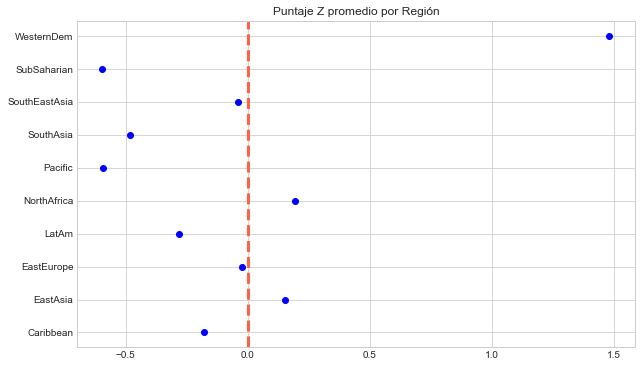

In [14]:
plt.plot(df_region.values, df_region.index, 'o', color='blue')
plt.title('Puntaje Z promedio por Región')
plt.axvline(df_gle['value_z'].mean(), color='tomato', lw=3, linestyle='--')

### 5. Curvas de densidad

Variables: "imf_pop", "gle_cgdpc", y "wdi_exph"

Usaremos stats.gaussian_kde para suavizar los valores de densidad y estimar curvas de densidad de probabilidad.

In [15]:
# dataframe con columnas utiles
df_density = df.loc[:, ['imf_pop', 'gle_cgdpc', 'wdi_exph']]

In [16]:
def curvas_densidad(df, variable):
    tmp = df[variable].dropna()
    # extraemos los limites de la variable
    x_max, x_min = tmp.max(), tmp.min()
    # creamos un array para el eje x a partir de los limites
    x_axis = np.linspace(x_min, x_max, 100)
    # aplicamos el kernel gaussiano para suavizar los valores de la variable
    gauss_kde = stats.gaussian_kde(tmp)
    Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
    plt.plot(x_axis, Z, color='blue', lw=3)
    plt.title('Curva de densidad: {}'.format(variable))
    plt.show()

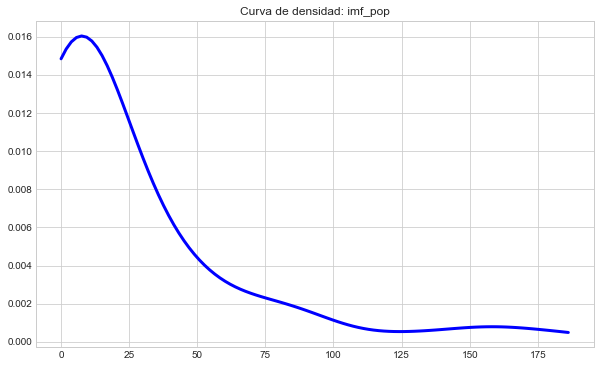

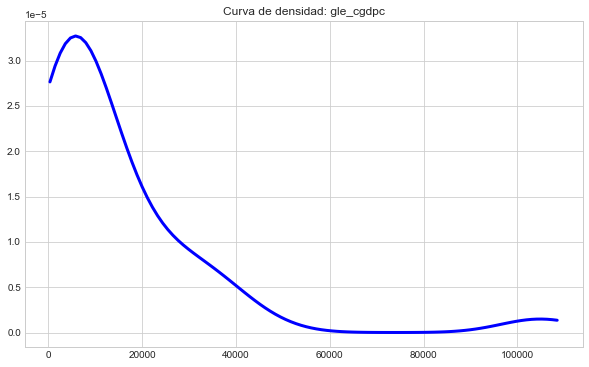

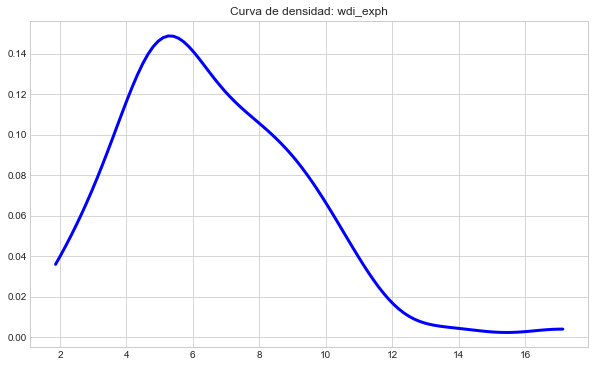

In [17]:
# iteramos sobre las columnas solicitadas
for col in df_density.columns:
    curvas_densidad(df_density, col)